In [38]:
import numpy as np
import pylab as pl
x=[-2.5 ,-.5, -2.2, -1.9 ,-3.1, -2.3, -2, -1, -1.5, -1.1]
y=[2.4 ,.7 ,2.9, 2.2 ,3 ,2.7 ,1.6, 1.1 ,1.6 ,.9]

print("X : ",x)
print("Y : ",y)

X :  [-2.5, -0.5, -2.2, -1.9, -3.1, -2.3, -2, -1, -1.5, -1.1]
Y :  [2.4, 0.7, 2.9, 2.2, 3, 2.7, 1.6, 1.1, 1.6, 0.9]


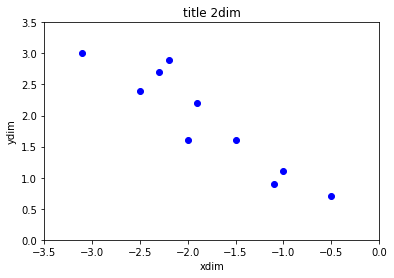

In [39]:
pl.title('title 2dim')
pl.xlabel("xdim")
pl.ylabel("ydim")

pl.xlim(-3.5,0.0)
pl.ylim(0,3.5)

pl.plot(x,y,'bo')
pl.show()

In [40]:
m_x=np.mean(x)
m_y=np.mean(y)
print('meanX',m_x)
print('meanY',m_y)

meanX -1.81
meanY 1.9100000000000001


In [41]:
x1=x-m_x
y1=y-m_y
print(x1)
print(y1)

[-0.69  1.31 -0.39 -0.09 -1.29 -0.49 -0.19  0.81  0.31  0.71]
[ 0.49 -1.21  0.99  0.29  1.09  0.79 -0.31 -0.81 -0.31 -1.01]


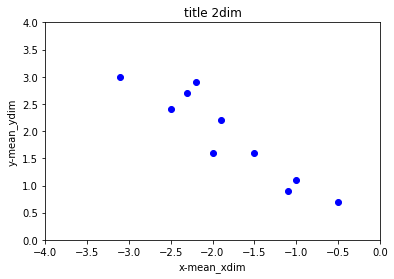

In [42]:
pl.title('title 2dim')
pl.xlabel("x-mean_xdim")
pl.ylabel("y-mean_ydim")

pl.xlim(-4,0)
pl.ylim(0,4)

pl.plot(x,y,'bo')
pl.show()

In [43]:
import pandas as pd

m=np.array([x1,y1]).T
df=pd.DataFrame(m,index=[i for i in range(1,len(x1)+1)],columns=['x1','y1'])
print(df)

      x1    y1
1  -0.69  0.49
2   1.31 -1.21
3  -0.39  0.99
4  -0.09  0.29
5  -1.29  1.09
6  -0.49  0.79
7  -0.19 -0.31
8   0.81 -0.81
9   0.31 -0.31
10  0.71 -1.01


In [44]:
cov_matrix=np.cov(m.T)
df=pd.DataFrame(cov_matrix,index=['x','y'],columns=['x','y'])
print(df)

          x         y
x  0.616556 -0.615444
y -0.615444  0.716556


In [45]:
eigenvalue,eigenvector=np.linalg.eig(cov_matrix)
print('vector proprios')
for i in range(len(eigenvalue)):
    print('lambda',i+1,":",eigenvalue[i])

vector proprios
lambda 1 : 0.04908339893832736
lambda 2 : 1.2840277121727837


In [46]:
print('vector proprios')
df=pd.DataFrame(eigenvector,index=['1','2'],columns=['X1','X2'])
print(df)

vector proprios
         X1        X2
1 -0.735179  0.677873
2 -0.677873 -0.735179


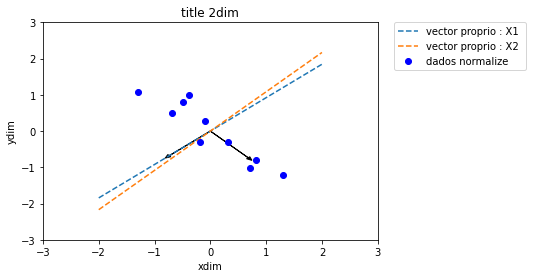

In [47]:
x=[i for i in range(-2,3)]
eigv1=[eigenvector[1][0]*i/eigenvector[0][0] for i in x]
eigv2=[eigenvector[1][1]*i/eigenvector[1][0] for i in x]

pl.arrow(0, 0, eigenvector[0][0], eigenvector[1][0],head_width=0.08,head_length=.1,fc='k',ec='k')
pl.arrow(0, 0, eigenvector[0][1], eigenvector[1][1],head_width=0.08,head_length=.1,fc='k',ec='k')

pl.plot(x,eigv1,linestyle='--',label='vector proprio : X1 ')
pl.plot(x,eigv2,linestyle='--',label='vector proprio : X2 ')
pl.plot(x1,y1,'bo',label='dados normalize')


pl.title('title 2dim')
pl.xlabel("xdim")
pl.ylabel("ydim")

pl.xlim([-3,3])
pl.ylim([-3,3])
pl.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

pl.show()

In [48]:
idx=eigenvalue.argsort()[::-1]
print('   ')
for i in idx:
    print('lambda',i+1,':',eigenvalue[i])

   
lambda 2 : 1.2840277121727837
lambda 1 : 0.04908339893832736


In [49]:
print('  ')
sortedeigenvector=eigenvector[:,idx]
df=pd.DataFrame(sortedeigenvector,index=['1','2'],columns=['X1','X2'])
print(df)

  
         X1        X2
1  0.677873 -0.735179
2 -0.735179 -0.677873


In [50]:
print('Feature Vector :F ')
f=eigenvector[:,idx]
df=pd.DataFrame(sortedeigenvector,index=['1','2'],columns=['V1','V2'])
print(df)

Feature Vector :F 
         V1        V2
1  0.677873 -0.735179
2 -0.735179 -0.677873


In [51]:
print('dataset normalized : M')
m=np.array([x1,y1]).T
df=pd.DataFrame(m,index=[i for i in range(1,len(x1)+1)],columns=['x1','y1'])
print(df)

dataset normalized : M
      x1    y1
1  -0.69  0.49
2   1.31 -1.21
3  -0.39  0.99
4  -0.09  0.29
5  -1.29  1.09
6  -0.49  0.79
7  -0.19 -0.31
8   0.81 -0.81
9   0.31 -0.31
10  0.71 -1.01


In [52]:
transposed_f=f.T
transposed_m=m.T

headers=[i for i in range(1,len(x1)+1)]

r=np.dot(transposed_f,transposed_m)
print('dataset transposed')
df=pd.DataFrame(r,index=['x1','y1'],columns=headers)
print(df)

dataset transposed
          1         2         3         4         5         6         7   \
x1 -0.827970  1.777580 -0.992197 -0.274210 -1.675801 -0.912949  0.099109   
y1  0.175115 -0.142857 -0.384375 -0.130417  0.209498 -0.175282  0.349825   

          8         9         10  
x1  1.144572  0.438046  1.223821  
y1 -0.046417 -0.017765  0.162675  


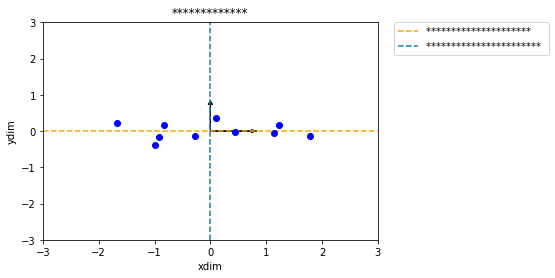

In [53]:
new_x=r[0,]
new_y=r[1,]

x=[i for i in range(-2,3)]

pl.arrow(0,0,-eigenvector[0][0],0,head_width=0.08,head_length=.1,fc='k',ec='k')
pl.arrow(0,0,0, -eigenvector[1][1],head_width=0.08,head_length=.1,fc='k',ec='k')

pl.axhline(0,linestyle='--',color='#FFA500',label='********************* ')
pl.axvline(0,linestyle='--',label='*********************** ')


pl.plot(new_x,new_y,'bo')
pl.title('*************')
pl.xlabel("xdim")
pl.ylabel("ydim")
pl.xlim([-3,3])
pl.ylim([-3,3])
pl.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
pl.show()

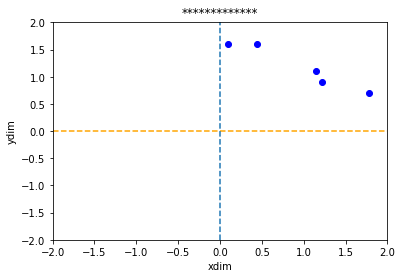

In [60]:
Y=[0 for i in range(10)]
pl.plot(new_x,y,'bo')
pl.axhline(0,linestyle='--',color='#FFA500')
pl.axvline(0,linestyle='--')

pl.title('*************')
pl.xlabel("xdim")
pl.ylabel("ydim")
pl.xlim([-2.0,2.0])
pl.ylim([-2.0,2.0])
pl.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn import preprocessing

In [64]:
df=pd.read_csv('1.csv',sep=',')
df.head()

,load,tempc,year,month,day,hour
0,1094.045496,-3.574477,2002,1,1,0
1,1083.517981,-3.134136,2002,1,1,1
2,1085.038740,-4.623604,2002,1,1,2
3,1093.381853,-1.789366,2002,1,1,3
4,1106.651296,-0.473536,2002,1,1,4


In [65]:
df.shape

(148920, 6)

In [66]:
df1=df.iloc[:,1:17]



In [67]:
scaled_df=preprocessing.scale(df.T) 
#StandardScaler().fit_transform(df.T)
pca=PCA()
pca.fit(scaled_df)
pca_df=pca.transform(scaled_df)

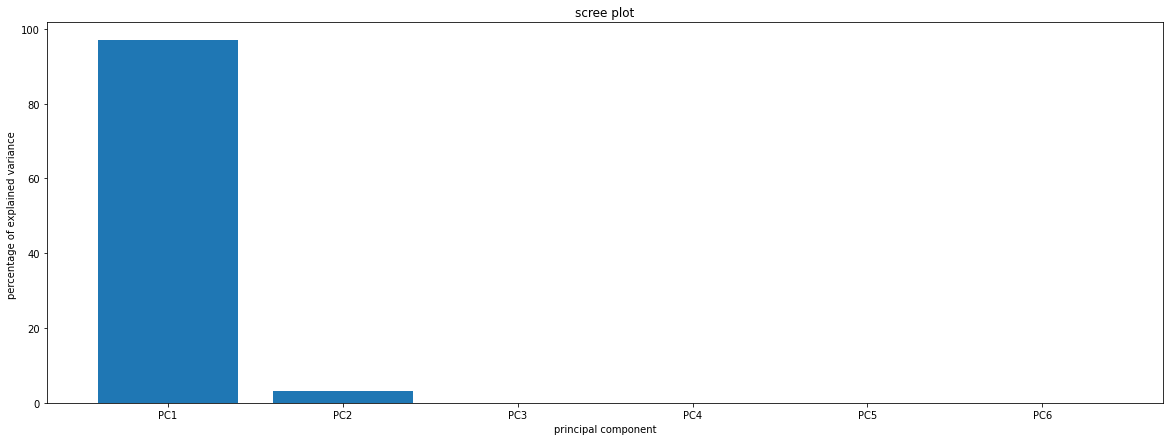

In [69]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(per_var)+1) ]
fig=plt.figure(figsize=(20,7))
plt.bar(x=range(1,len(per_var)+1) ,height=per_var , tick_label=labels)
plt.ylabel('percentage of explained variance ')
plt.xlabel('principal component')
plt.title('scree plot')
plt.savefig('pca.jpg')
plt.show()

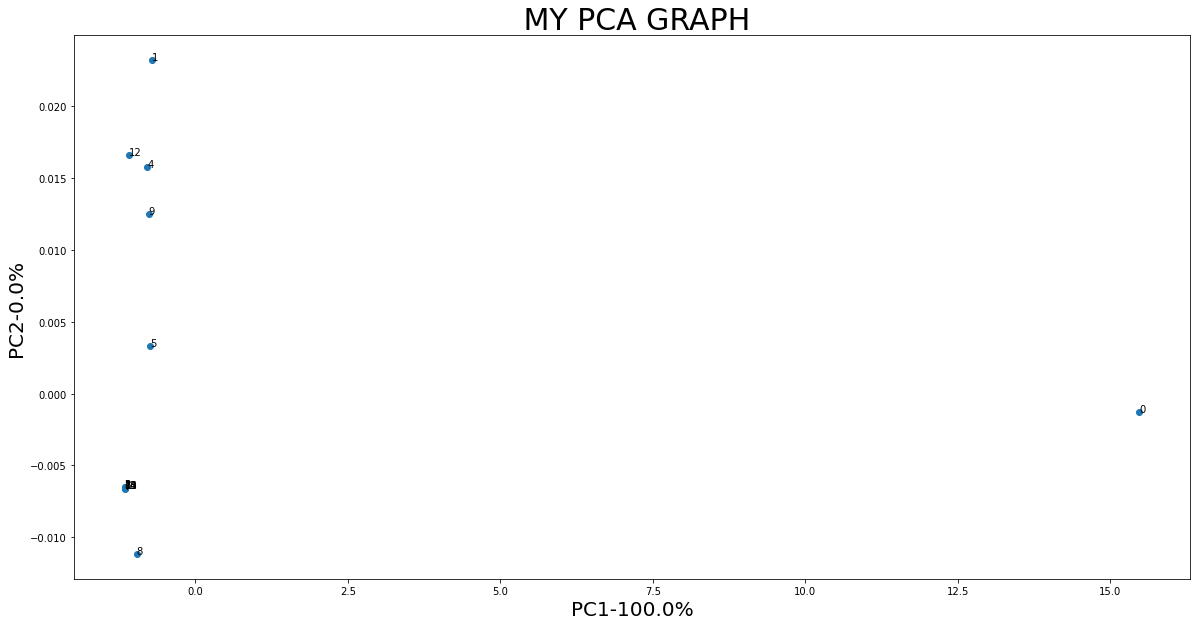

In [17]:
pca_df_2=pd.DataFrame(pca_df , columns=labels)    #  ,index=[*load , *temp ]
plt.figure(figsize=(20,10))
plt.scatter(pca_df_2.PC1,pca_df_2.PC2)
plt.title(' MY PCA GRAPH',fontsize=30)
plt.xlabel('PC1-{0}%'.format(per_var[0]),fontsize=20)
plt.ylabel('PC2-{0}%'.format(per_var[1]),fontsize=20)


for sample in pca_df_2.index:
    plt.annotate(sample,(pca_df_2.PC1.loc[sample],pca_df_2.PC2.loc[sample]))

plt.savefig('pca sample 2.png')
    
plt.show()

In [25]:
import numpy as np
import pylab as pl
data=pd.read_csv('1.csv',sep=",")
x=data['load']
y=data['tempc']

print("X : ",x)
print("Y : ",y)

X :  0         1094.045496
1         1083.517981
2         1085.038740
3         1093.381853
4         1106.651296
             ...     
148915    3090.498042
148916    3100.590775
148917    3112.196787
148918    3110.924014
148919    3120.418939
Name: load, Length: 148920, dtype: float64
Y :  0         -3.574477
1         -3.134136
2         -4.623604
3         -1.789366
4         -0.473536
            ...    
148915    16.471999
148916    14.945567
148917    14.622224
148918    19.393026
148919    18.495315
Name: tempc, Length: 148920, dtype: float64


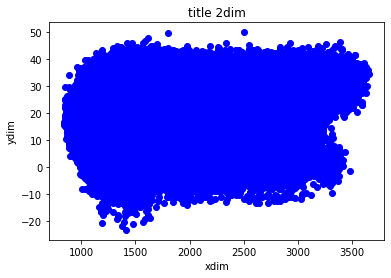

In [27]:
pl.title('title 2dim')
pl.xlabel("xdim")
pl.ylabel("ydim")

#pl.xlim(-3.5,0.0) #lim in each dimention
#pl.ylim(0,3.5)

pl.plot(x,y,'bo')
pl.show()

In [28]:
m_x=np.mean(x)
m_y=np.mean(y)
print('meanX',m_x)
print('meanY',m_y)

meanX 1582.4240536747566
meanY 18.264108195827987


In [29]:
x1=x-m_x
y1=y-m_y
print(x1)
print(y1)

0         -488.378558
1         -498.906073
2         -497.385313
3         -489.042201
4         -475.772758
             ...     
148915    1508.073988
148916    1518.166721
148917    1529.772733
148918    1528.499960
148919    1537.994885
Name: load, Length: 148920, dtype: float64
0        -21.838585
1        -21.398244
2        -22.887713
3        -20.053474
4        -18.737644
            ...    
148915    -1.792109
148916    -3.318541
148917    -3.641884
148918     1.128918
148919     0.231207
Name: tempc, Length: 148920, dtype: float64


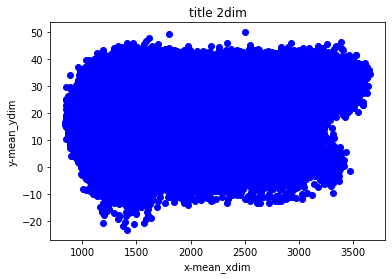

In [30]:
pl.title('title 2dim')
pl.xlabel("x-mean_xdim")
pl.ylabel("y-mean_ydim")

#pl.xlim(-4,0)
#pl.ylim(0,4)

pl.plot(x,y,'bo')
pl.show()

In [31]:
import pandas as pd

m=np.array([x1,y1]).T
df=pd.DataFrame(m,index=[i for i in range(1,len(x1)+1)],columns=['x1','y1'])
print(df)

                 x1         y1
1       -488.378558 -21.838585
2       -498.906073 -21.398244
3       -497.385313 -22.887713
4       -489.042201 -20.053474
5       -475.772758 -18.737644
...             ...        ...
148916  1508.073988  -1.792109
148917  1518.166721  -3.318541
148918  1529.772733  -3.641884
148919  1528.499960   1.128918
148920  1537.994885   0.231207

[148920 rows x 2 columns]


In [32]:
cov_matrix=np.cov(m.T)
df=pd.DataFrame(cov_matrix,index=['x','y'],columns=['x','y'])
print(df)

               x           y
x  288460.166361  802.829663
y     802.829663  110.823788


In [33]:
eigenvalue,eigenvector=np.linalg.eig(cov_matrix)
print('vector proprios')
for i in range(len(eigenvalue)):
    print('lambda',i+1,":",eigenvalue[i])

vector proprios
lambda 1 : 288462.401602671
lambda 2 : 108.58854591642744


In [34]:
print('vector proprios')
df=pd.DataFrame(eigenvector,index=['1','2'],columns=['X1','X2'])
print(df)

vector proprios
         X1        X2
1  0.999996 -0.002784
2  0.002784  0.999996


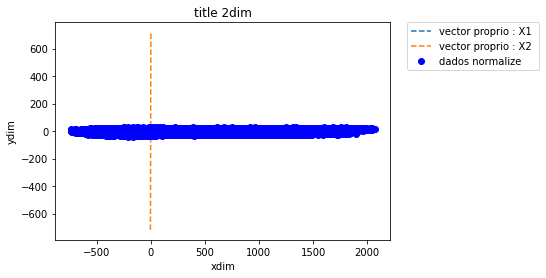

In [55]:
x=[i for i in range(-2,3)]
eigv1=[eigenvector[1][0]*i/eigenvector[0][0] for i in x]
eigv2=[eigenvector[1][1]*i/eigenvector[1][0] for i in x]



pl.plot(x,eigv1,linestyle='--',label='vector proprio : X1 ')
pl.plot(x,eigv2,linestyle='--',label='vector proprio : X2 ')
pl.plot(x1,y1,'bo',label='dados normalize')


pl.title('title 2dim')
pl.xlabel("xdim")
pl.ylabel("ydim")

pl.arrow(0, 0, eigenvector[0][0], eigenvector[1][0],head_width=0.08,head_length=.1,fc='k',ec='k')
pl.arrow(0, 0, eigenvector[0][1], eigenvector[1][1],head_width=0.08,head_length=.1,fc='k',ec='k')



#pl.xlim([-3,3])
#pl.ylim([-3,3])
pl.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

pl.show()

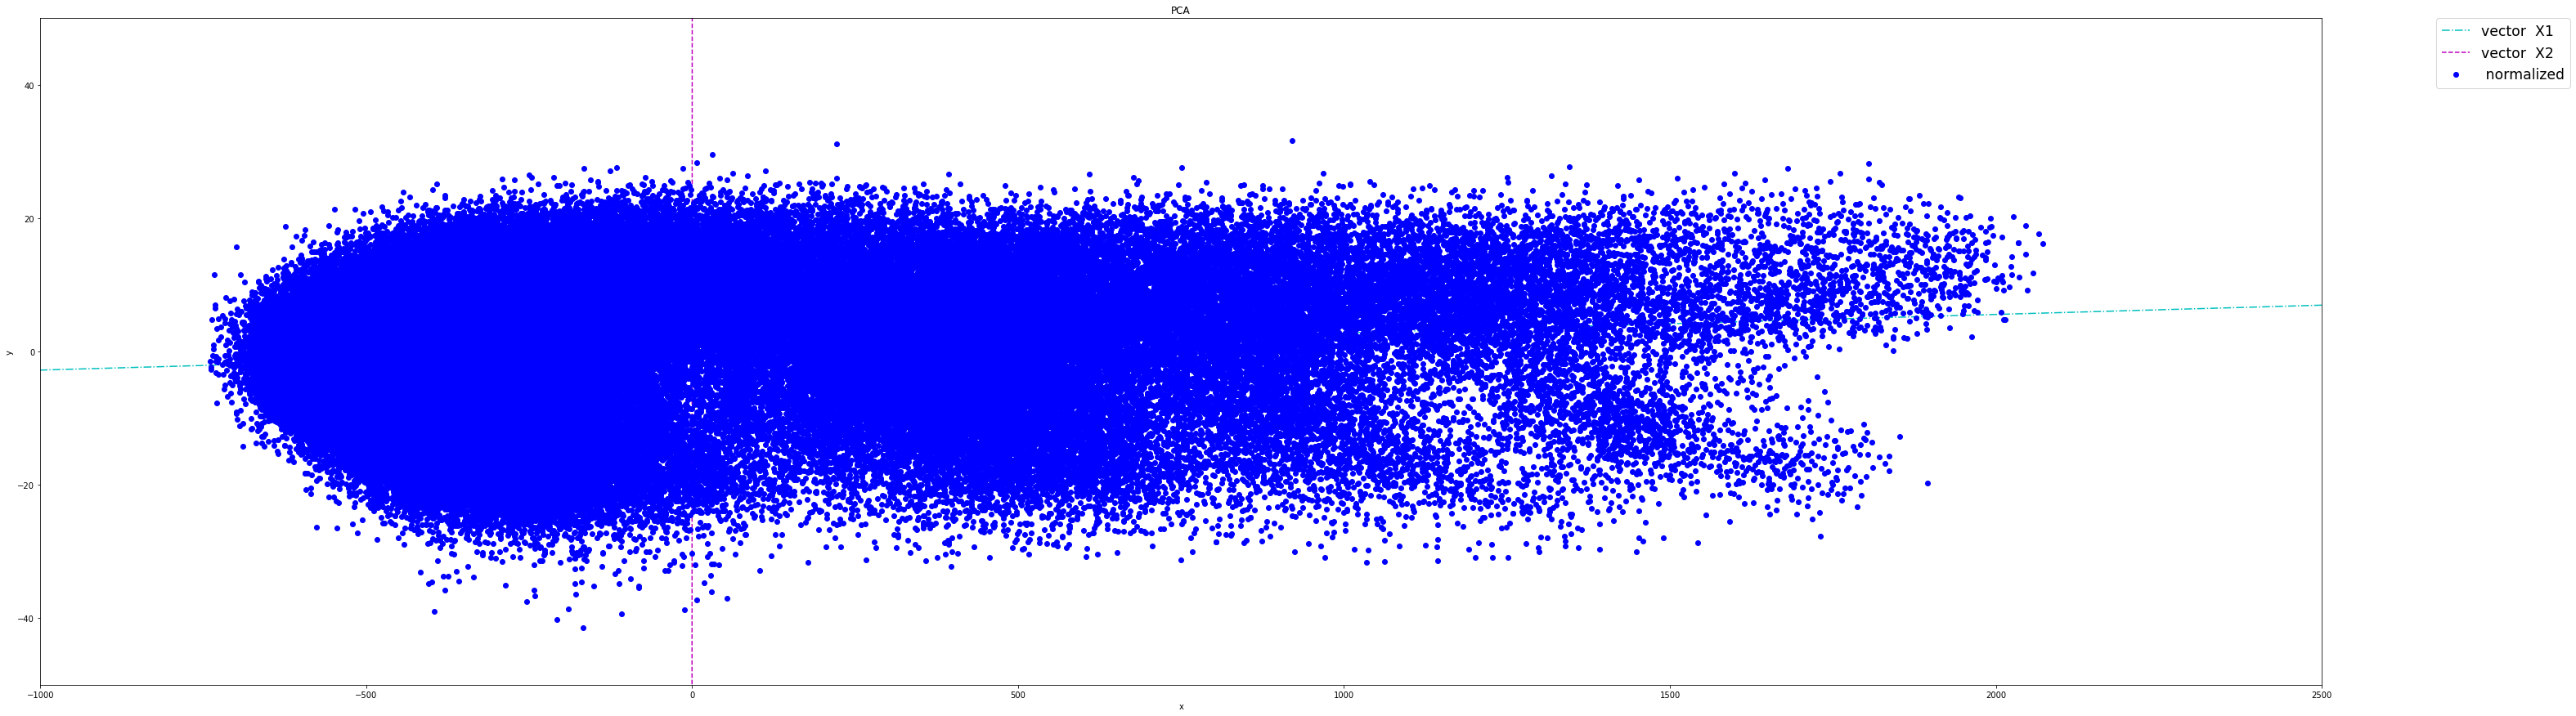

In [86]:
x=[i for i in range(-148920//2,148920//2)]
eigv2=[eigenvector[1][0]*i/eigenvector[0][0] for i in x]
eigv1=[eigenvector[1][1]*i/eigenvector[1][0] for i in x]

fig=plt.figure(figsize=(50,15))
pl.plot(x,eigv2,linestyle='-.',label='vector  X1 ',color='c')
pl.plot(x,eigv1,linestyle='--',label='vector  X2 ',color='m')
pl.plot(x1,y1,'bo',label=' normalized')

pl.title('PCA')
pl.xlabel("x")
pl.ylabel("y")

pl.xlim([-1000,2500])
pl.ylim([-50,50])
pl.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.,fontsize='xx-large')

pl.arrow(0, 0, eigenvector[0][0], eigenvector[1][0],head_width=0.9,head_length=.5,fc='k',ec='k')
pl.arrow(0, 0, eigenvector[0][1], eigenvector[1][1],head_width=0.9,head_length=.5,fc='k',ec='k')

plt.savefig('pca-vector.jpg')

pl.show()

In [78]:
print(eigv2,eigv1)

[-207.31184199894165, -207.30905779477834, -207.30627359061506, -207.30348938645173, -207.30070518228845, -207.29792097812515, -207.29513677396187, -207.29235256979857, -207.28956836563526, -207.28678416147199, -207.28399995730868, -207.2812157531454, -207.2784315489821, -207.2756473448188, -207.2728631406555, -207.2700789364922, -207.2672947323289, -207.26451052816563, -207.26172632400232, -207.25894211983902, -207.25615791567574, -207.25337371151244, -207.25058950734916, -207.24780530318583, -207.24502109902255, -207.24223689485925, -207.23945269069597, -207.23666848653266, -207.23388428236936, -207.23110007820608, -207.22831587404278, -207.2255316698795, -207.2227474657162, -207.2199632615529, -207.2171790573896, -207.2143948532263, -207.211610649063, -207.20882644489973, -207.20604224073642, -207.20325803657312, -207.20047383240984, -207.19768962824654, -207.19490542408326, -207.19212121991993, -207.18933701575665, -207.18655281159334, -207.18376860743007, -207.1809844032668, -207.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [63]:
idx=eigenvalue.argsort()[::-1]
print('  ***  ')
for i in idx:
    print('lambda',i+1,':',eigenvalue[i])

  ***  
lambda 1 : 288462.401602671
lambda 2 : 108.58854591642744


In [45]:
print('  ')
sortedeigenvector=eigenvector[:,idx]
df=pd.DataFrame(sortedeigenvector,index=['1','2'],columns=['X1','X2'])
print(df)

  
         X1        X2
1  0.999996 -0.002784
2  0.002784  0.999996


In [46]:
print('Feature Vector :F ')
f=eigenvector[:,idx]
df=pd.DataFrame(sortedeigenvector,index=['1','2'],columns=['V1','V2'])
print(df)

Feature Vector :F 
         V1        V2
1  0.999996 -0.002784
2  0.002784  0.999996


In [47]:
print('dataset normalized : M')
m=np.array([x1,y1]).T
df=pd.DataFrame(m,index=[i for i in range(1,len(x1)+1)],columns=['x1','y1'])
print(df)

dataset normalized : M
                 x1         y1
1       -488.378558 -21.838585
2       -498.906073 -21.398244
3       -497.385313 -22.887713
4       -489.042201 -20.053474
5       -475.772758 -18.737644
...             ...        ...
148916  1508.073988  -1.792109
148917  1518.166721  -3.318541
148918  1529.772733  -3.641884
148919  1528.499960   1.128918
148920  1537.994885   0.231207

[148920 rows x 2 columns]


In [48]:
transposed_f=f.T
transposed_m=m.T

headers=[i for i in range(1,len(x1)+1)]

r=np.dot(transposed_f,transposed_m)
print('dataset transposed')
df=pd.DataFrame(r,index=['x1','y1'],columns=headers)
print(df)

dataset transposed
        1           2           3           4           5           6       \
x1 -488.437468 -498.963716 -497.447109 -489.096138 -475.823083 -448.785268   
y1  -20.478760  -20.009110  -21.502807  -18.691808  -17.412928  -16.246599   

        7           8           9           10      ...       148911  \
x1 -412.779937 -363.138803 -355.780768 -333.838654  ...  1391.345382   
y1  -19.661696  -23.274122  -18.090327  -16.048886  ...   -21.631249   

         148912       148913       148914       148915       148916  \
x1  1361.496740  1364.402929  1398.018513  1494.408124  1508.063154   
y1   -15.627474    -9.351602   -10.786183    -5.306563    -5.990871   

         148917       148918       148919       148920  
x1  1518.151598  1529.756664  1528.497179  1537.989568  
y1    -7.545398    -7.901053    -3.126726    -4.050870  

[2 rows x 148920 columns]


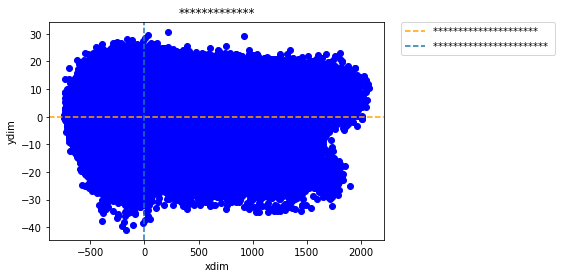

In [53]:
new_x=r[0,]
new_y=r[1,]

x=[i for i in range(-2,3)]

pl.plot(new_x,new_y,'bo')
pl.title('*************')
pl.xlabel("xdim")
pl.ylabel("ydim")

pl.arrow(0,0,-eigenvector[0][0],0,head_width=0.08,head_length=.1,fc='k',ec='k')
pl.arrow(0,0,0, -eigenvector[1][1],head_width=0.08,head_length=.1,fc='k',ec='k')

pl.axhline(0,linestyle='--',color='#FFA500',label='********************* ')
pl.axvline(0,linestyle='--',label='*********************** ')



#pl.xlim([-3,3])
#pl.ylim([-3,3])
pl.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
pl.show()

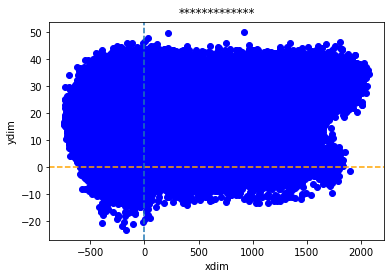

In [51]:
Y=[0 for i in range(10)]
pl.plot(new_x,y,'bo')
pl.axhline(0,linestyle='--',color='#FFA500')
pl.axvline(0,linestyle='--')

pl.title('*************')
pl.xlabel("xdim")
pl.ylabel("ydim")
#pl.xlim([-2.0,2.0])
#pl.ylim([-2.0,2.0])
pl.show()